<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
    Lab 01
    </div>

<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
   Lab 1
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Phần 2 - Tiền xử lí và khám phá
</div>

# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import zipfile
import plotly.graph_objects as go
import pandas as pd
import plotly.graph_objects as go
import math


# 1. Đọc dữ liệu
Do kích thước của tập dữ liệu gốc rất lớn (hơn 7 triệu dòng), nhóm em xin phép lấy ngẫu nhiên 10% dữ liệu ra để thực hiện bài tập nhóm. Tập dữ liệu rút gọn này được lưu với tên US_Accidents_Reduced.csv.

Do kích thước của tập dữ liệu này còn lớn, gây khó khăn khi upload lên github để cả nhóm làm việc với nhau, nhóm em đã nén nó lại

In [2]:
data_reduced_filezippath=r"data/US_Accidents_Reduced.zip"
data_reduced_filepath=r"data/US_Accidents_Reduced.csv"

# Kiểm tra xem tệp đã được giải nén chưa
if not os.path.exists(data_reduced_filepath):
    if os.path.exists(data_reduced_filezippath):
        with zipfile.ZipFile(data_reduced_filezippath, 'r') as zip_ref:
            zip_ref.extractall("data")
        zip_ref.close()
    else:
        print("Không tìm thấy tệp dữ liệu")
        assert False
# Đọc tệp CSV vào DataFrame
chunk_size = 100000  # Điều chỉnh phù hợp với bộ nhớ của hệ thống
chunks = pd.read_csv(data_reduced_filepath, chunksize=chunk_size)

# List để lưu từng chunk
chunk_list = []

# Lặp qua từng chunk và thêm vào list
for chunk in chunks:
    chunk_list.append(chunk)

# Gộp tất cả các chunk thành một DataFrame
df = pd.concat(chunk_list, ignore_index=True)


# 2. Tìm hiểu dữ liệu
Xem số dòng và số cột của bộ dữ liệu vừa đọc

In [3]:
df.shape

(772839, 46)

Vậy là dữ liệu đã đọc có khoảng 772 nghìn dòng và 46 cột. Ta có thể nhìn qua một số dòng và cột của dữ liệu

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


Tiếp theo đó, ta sẽ tìm hiểu về ý nghĩa của các cột trong dữ liệu:

- **ID**: ID của vụ tai nạn
- **Source**: Nguồn dữ liệu thô 
- **Severity**: Mức độ nghiêm trọng của vụ tai nạn, có giá trị từ 1 -> 4, biểu thị mức độ ảnh hưởng tăng dần lên hoạt động giao thông
- **Start_Time**: Thời gian bắt đầu vụ tai nạn theo giờ địa phương
- **End_Time**: Thời gian kết thúc vụ tai nạn, chỉ thời gian ảnh hưởng đến giao thông chấm dứt theo giờ địa phương
- **Start_Lat**: Vĩ độ của địa điểm xảy ra tai nạn
- **Start_Lng**: Kinh độ của địa điểm xảy ra tai nạn
- **End_Lat**: Vĩ độ của địa điểm kết thúc
- **End_Lng**: Kinh độ của địa điểm kết thúc
- **Distance(mi)**: Chiều dài đoạn đường bị ảnh hưởng bởi vụ tai nạn, tính bằng Miles
- **Description**: Mô tả về vụ tai nạn
- **Street**: Tên đường trong trường địa chỉ
- **City**: Tên thành phố trong trường địa chỉ
- **County**: Tên quận trong trường địa chỉ
- **State**: Tên bang trong trường địa chỉ
- **Zipcode**: Mã bưu chính trong trường địa chỉ
- **Country**: Tên quốc gia trong trường địa chỉ
- **Timezone**: Múi giờ dựa trên vị trí xảy ra tai nạn (miền đông, miền trung,...)
- **Airport_Code**: Trạm thời tiết dựa trên sân bay, gần nhất với vị trí của vụ tai nạn
- **Weather_Timestamp**: Thời gian ghi nhận thông tin thời tiết (theo giờ địa phương)
- **Temperature(F)**: Hiển thị nhiệt độ (tính bằng Fahrenheit)
- **Wind_Chill(F)**: Hiển thị mức độ lạnh của không khí (tính bằng Fahrenheit)
- **Humidity(%)**: Hiển thị độ ẩm (tính bằng %)
- **Pressure(in)**: Hiển thị áp suất không khí (tính bằng inches)
- **Visibility(mi)**: Hiển thị tầm nhìn (tính bằng miles)
- **Wind_Direction**: Hiển thị hướng gió
- **Wind_Speed(mph)**: Hiển thị tốc độ gió (tính bằng miles / giờ)
- **Precipitation(in)**: Hiển thị lượng mưa tính theo inches (nếu có)
- **Weather_Condition**: Hiển thị tình trạng thời tiết (mưa, có tuyết, có sấm sét,...)
- **Amenity**: Chú thích địa điểm cho biết sự hiện diện của tiện nghi ở vị trí lân cận
- **Bump**: Chú thích địa điểm cho biết sự hiện diện của gờ giảm tốc ở vị trí lân cận
- **Crossing**: Chú thích địa điểm cho biết sự hiện diện của điểm băng qua ở vị trí lân cận
- **Give_Way**: Chú thích địa điểm cho biết sự hiện diện của đoạn nhường đường ở vị trí lân cận
- **Junction**: Chú thích địa điểm cho biết sự hiện diện của giao lộ ở vị trí lân cận
- **No_Exit**: Chú thích địa điểm cho biết sự hiện diện của đoạn đường không có lối ra ở vị trí lân cận
- **Railway**: Chú thích địa điểm cho biết sự hiện diện của đường sắt ở vị trí lân cận
- **Roundabout**: Chú thích địa điểm cho biết sự hiện diện của bùng binh ở vị trí lân cận
- **Station**: Chú thích địa điểm cho biết sự hiện diện của trạm tàu ở vị trí lân cận
- **Stop**: Chú thích địa điểm cho biết sự hiện diện của điểm dừng ở vị trí lân cận
- **Traffic_Calming**: Chú thích địa điểm cho biết sự hiện diện của các biện pháp giảm tốc ở vị trí lân cận
- **Traffic_Signal**: Chú thích địa điểm cho biết sự hiện diện của đèn giao thông ở vị trí lân cận
- **Turning_Loop**: Chú thích địa điểm cho biết sự hiện diện của vòng xoay ở vị trí lân cận
- **Sunrise_Sunset**: Hiển thị khoảng thời gian trong ngày (dựa vào bình minh / hoàng hôn)
- **Civil_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng dân sự)
- **Nautical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng hải lý)
- **Astronomical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng thiên văn)


# 3. Tiền xử lí

##  3.1 Xử lí trùng lặp dữ liệu

Kiểm tra xem có dòng nào bị lặp lại hay không? Nếu có, ta sẽ thực hiện xử lí các dòng thừa đó

In [5]:
is_duplicated = np.any(df.duplicated())
if is_duplicated:
    print('Dữ liệu có trùng lặp')
else:
    print('Dữ liệu không trùng lặp')

Dữ liệu không trùng lặp


Vậy dữ liệu của chúng ta không có trùng lặp dòng.

Tiếp theo đó, ta kiểm tra xem có cột nào chỉ chứa duy nhất 1 loại giá trị hay không?

In [6]:
duplicated_cols = [col for col in df.columns if df[col].nunique() == 1]
print(duplicated_cols)

['Country', 'Turning_Loop']


In [7]:
# df[duplicated_cols].value_counts()
df["Country"].unique()
df["Turning_Loop"].unique()

array([False])

- Cột `Country`, `Turning_Loop` chỉ có các 1 giá trị là US và False .Thực tế ta không thu được nhiều giá trị với các cột chỉ có một giá trị nên ta có thể xoá đi 2 cột này.

In [8]:
df=df.drop(columns=duplicated_cols)

## 3.2 Kiểm tra và xử lí kiểu dữ liệu của các cột

- Tổng quan dữ liệu các cột

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432291 non-null  float64
 8   End_Lng                432291 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771751 non-null  object 
 12  City                   772811 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nu

- Xét về kiểu dữ liệu: Ta thấy có cột `Start_Time`,`End_Time`, `Weather_Timestamp` có ý nghĩa thời gian nhưng được lưu ở kiểu **object**  .Vì vậy cần chuyển đổi kiểu dữ liệu của 3 cột bên trên sang dạng **datetime**.

In [12]:
# #Chuyển các cột time sang kiểu datetime
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')
    #df[col]=pd.to_datetime(df[col], format='mixed')


In [13]:
#in ra cột Start_Time, End_Time, Weather_Timestamp
df[time_cols].head()

,Start_Time,End_Time,Weather_Timestamp
0,2020-04-17 09:29:30,2020-04-17 10:29:30,2020-04-17 09:24:00
1,2022-04-21 10:01:00,2022-04-21 11:44:08,2022-04-21 09:55:00
2,2016-08-12 16:45:00,2016-08-12 17:15:00,2016-08-12 16:53:00
3,2019-09-20 15:22:16,2019-09-20 15:56:00,2019-09-20 14:58:00
4,2019-06-03 16:55:43,2019-06-03 18:12:09,2019-06-03 16:51:00


Do cột Severity thể hiện mức độ nghiêm trọng của tai nạn, với 1 là mức thấp nhất, 4 là mức cao nhất, kiểu dữ liệu có nó nên là category (object)

In [14]:
#Chuyển kiểu dữ liệu cột Severity sang object
df['Severity']=df['Severity'].astype(object)

- Kiểu dữ liệu các cột sau khi chuyển đổi

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     772839 non-null  object        
 1   Source                 772839 non-null  object        
 2   Severity               772839 non-null  object        
 3   Start_Time             772839 non-null  datetime64[ns]
 4   End_Time               772839 non-null  datetime64[ns]
 5   Start_Lat              772839 non-null  float64       
 6   Start_Lng              772839 non-null  float64       
 7   End_Lat                432291 non-null  float64       
 8   End_Lng                432291 non-null  float64       
 9   Distance(mi)           772839 non-null  float64       
 10  Description            772838 non-null  object        
 11  Street                 771751 non-null  object        
 12  City                   772811 non-null  obje

Xét hai cột `Wind_Chill(F)`, `Temperature(F)` có đơn vị là **Fahrenheit**, để dễ dàng hình dung, ta sẽ chuyển về đơn vị **Celcius**

In [16]:
df.rename(columns={'Wind_Chill(F)': 'Wind_Chill(C)', 'Temperature(F)': 'Temperature(C)'}, inplace=True)

# Chuyển đổi độ F sang độ C
df['Wind_Chill(C)'] = (df['Wind_Chill(C)'] - 32) * 5/9
df['Temperature(C)'] = (df['Temperature(C)'] - 32) * 5/9

## 3.3 Bỏ đi các cột không cần dùng

Tập dữ liệu ta dùng là một tập có rất nhiều, trong đó có một số cột không thật sự sẽ đem lại thông tin hữu ích, vì vậy ta sẽ loại bỏ chúng trước khi tiến vào bước kế tiếp

- Bỏ cột Zipcode, Street vì thông tin về địa điểm đã được biểu diễn qua các cột khác như County và City.
- Loại bỏ cột ID vì nó chỉ làm nhiễu khi không cần thiết sau khi kiểm tra trùng lặp.
- Loại bỏ cột về vị trí của trạm thời tiết gần vụ tai nạn, vì không quan tâm đến thông tin này.
- Bỏ cột Source vì thông tin về nguồn cung cấp không cần thiết cho bài toán hiện tại.
- Bỏ cột Mô tả chi tiết vì chúng là thông tin quá mức chi tiết.

In [17]:
df.drop(columns=['Zipcode', 'Airport_Code', 'ID','Source','Description','Street'], inplace=True)

## 4. Khám phá dữ liệu

### 4.1 Với dữ liệu dạng số

Trước hết, ta sẽ lấy danh sách các cột có kiểu dữ liệu là số.

In [18]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Temperature(C)', 'Wind_Chill(C)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

#### 4.1.2 Xử lí missing value

Đầu tiên, chúng ta cần biết tỉ lệ missing value ở mỗi cột là bao nhiêu?

Ta sẽ vẽ biểu đồ cột để quan sát tỉ lệ này

In [19]:
# Lặp qua các cột số để tính tỉ lệ giá trị thiếu
missing_percentages = [(col, df[col].isnull().mean() * 100) for col in numerical_cols]

# Sắp xếp theo tỉ lệ giảm dần
missing_percentages.sort(key=lambda x: x[1], reverse=False)

# Tạo DataFrame từ list
missing_df = pd.DataFrame(missing_percentages, columns=['Cột', 'Tỉ lệ giá trị thiếu (%)'])

# Vẽ biểu đồ cột ngang sử dụng Plotly
fig = go.Figure(go.Bar(
            x=missing_df['Tỉ lệ giá trị thiếu (%)'],
            y=missing_df['Cột'],
            orientation='h'))

fig.update_layout(
    title='Tỉ lệ giá trị thiếu trong các cột số',
    xaxis=dict(title='Tỉ lệ giá trị thiếu (%)'),
    yaxis=dict(title='Cột'),
    bargap=0.1,  # Độ rộng của khoảng trống giữa các cột
    margin=dict(l=100, r=50, t=50, b=50)  # Lề của biểu đồ
)

fig.show()


- Chúng ta có thể thấy, 2 cột `End_lat` và `End_Lng` là 2 cột tọa độ có tỉ lệ missing cao. Do ta không cần dùng đến tọa độ kết thúc của các vụ tai nạn nên ta sẽ bỏ các cột này
- Những cột còn lại có thể điền missing value bằng **mean**

In [20]:
#drop cột End_lat và End_Lng
df=df.drop(columns=['End_Lat','End_Lng'])
numerical_cols = numerical_cols.drop(['End_Lat', 'End_Lng'])

# điền cho những cột còn lại
columns_to_fill_mean = numerical_cols
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

print(df[numerical_cols].isnull().sum())


Start_Lat            0
Start_Lng            0
Distance(mi)         0
Temperature(C)       0
Wind_Chill(C)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64


#### 4.1.3 Phân phối của dữ liệu dạng số

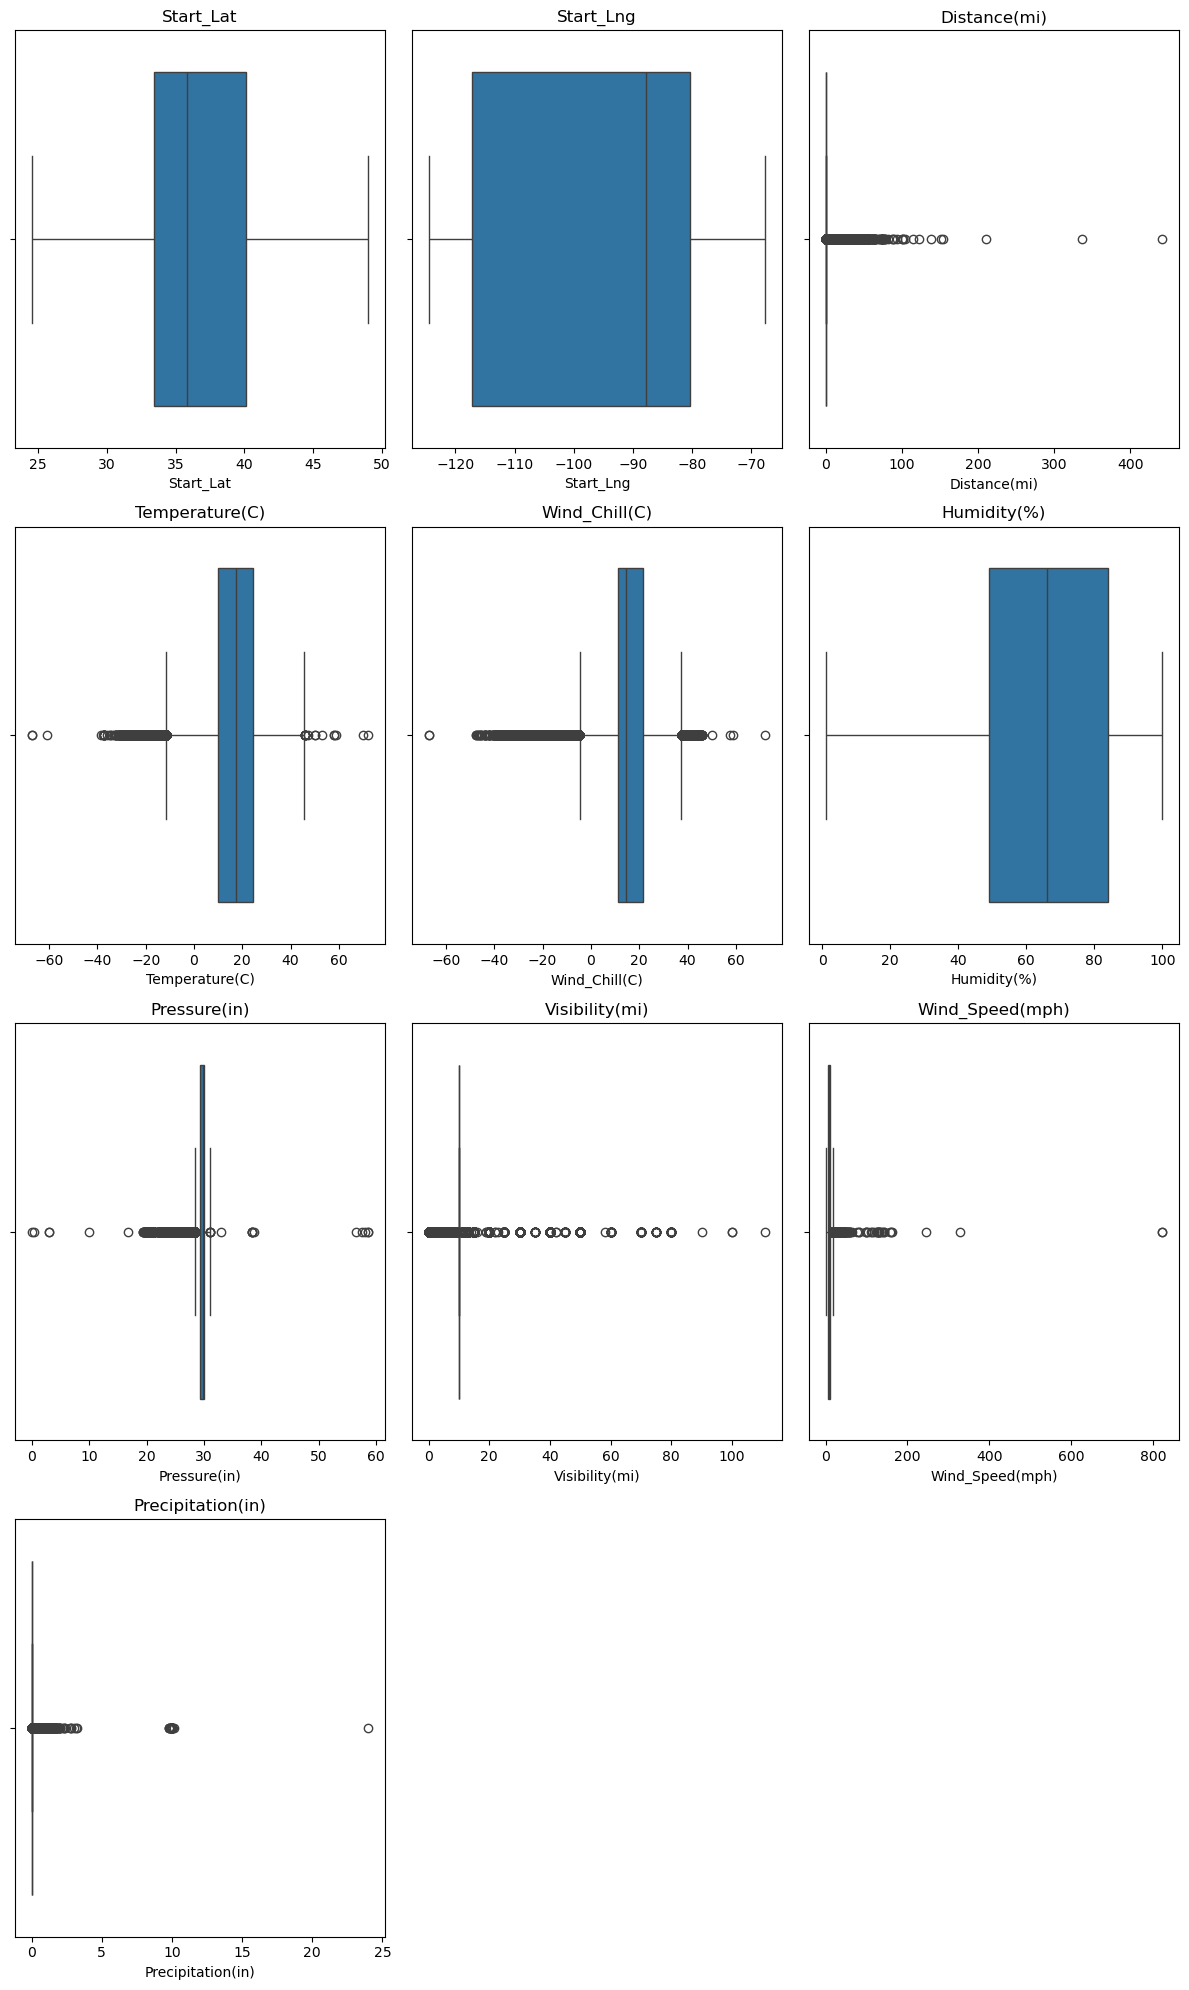

In [21]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Nhận xét:


### 4.2 Xử lí các cột categories

Tương tự như với dữ liệu dạng số, ta sẽ lấy danh sách các cột có kiểu dạng object và bool

In [22]:
#Chọn ra các cột có kiểu dữ liệu là category
category_cols = df.select_dtypes(include=['object','bool']).columns
category_cols

Index(['Severity', 'City', 'County', 'State', 'Timezone', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

#### 4.2.1 Xử lí missing value

Ta cũng sẽ vẽ biểu đồ cột để xem xét tỉ lệ missing value ở các cột trên

In [23]:
# Tính tỉ lệ giá trị thiếu của mỗi cột
missing_percentages = df[category_cols].isnull().mean() * 100

# Sắp xếp giảm dần các cột theo tỉ lệ giá trị thiếu
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

# Vẽ biểu đồ cột ngang sử dụng Plotly
fig = go.Figure(go.Bar(
            x=missing_percentages_sorted,
            y=missing_percentages_sorted.index,
            orientation='h',
            marker=dict(color='skyblue')
        ))

fig.update_layout(
    title='Tỉ lệ giá trị thiếu trong các cột category',
    xaxis=dict(title='Tỉ lệ giá trị thiếu (%)'),
    yaxis=dict(title='Cột')
)

fig.show()


Ta có thể thấy tỉ lệ giá trị bị thiếu ở các cột này là rất thấp, vậy nên, ta sẽ điền các giá trị bị thiếu này bằng mode.

In [24]:
#Điền các giá trị thiếu bằng giá trị mode
df[category_cols] = df[category_cols].apply(lambda x: x.fillna(x.mode()[0]))

Sau khi điền xong, ta sẽ kiểm tra lại lần nữa

In [25]:
#Kiếm tra lại xem còn có cột nào bị thiếu giá trị không (in ra cột có số lượng giá trị thiếu > 0)
missing_values = df[category_cols].isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

Vậy dữ liệu của ta đã không còn giá trị bị thiếu.

#### 4.2.1 Kiểm tra phân bố của các giá trị trong các cột categories

Trước hết, ta sẽ xem thử số giá trị độc nhất của mỗi cột.

In [26]:
#in ra số lượng giá trị độc nhất của các cột
unique_value_counts = df[category_cols].nunique().sort_values(ascending=True)
unique_value_counts

Junction                     2
Civil_Twilight               2
Sunrise_Sunset               2
Traffic_Signal               2
Traffic_Calming              2
Stop                         2
Station                      2
Roundabout                   2
Railway                      2
No_Exit                      2
Nautical_Twilight            2
Astronomical_Twilight        2
Crossing                     2
Bump                         2
Amenity                      2
Give_Way                     2
Timezone                     4
Severity                     4
Wind_Direction              24
State                       49
Weather_Condition          115
County                    1672
City                     10272
dtype: int64

Ta có thể thấy hầu hết các cột đều phù hợp với việc biểu diễn bằng biểu đồ tròn để quan sát phân bố của các giá trị trong cột, trừ các cột có quá nhiều giá trị, đối với các cột này, ta sẽ dùng biểu đồ cột để quan sát top 15 giá trị có tần suất xuất hiện cao nhất

Trước hết, ta sẽ vẽ biểu đồ tròn để quan sát cách dữ liệu phân phối ở các cột có ít loại giá trị

In [27]:
#Lấy ra tên các cột có số lượng giá trị độc nhất nhỏ hơn 5
pie_chart = unique_value_counts[unique_value_counts <= 5].index
pie_chart

Index(['Junction', 'Civil_Twilight', 'Sunrise_Sunset', 'Traffic_Signal',
       'Traffic_Calming', 'Stop', 'Station', 'Roundabout', 'Railway',
       'No_Exit', 'Nautical_Twilight', 'Astronomical_Twilight', 'Crossing',
       'Bump', 'Amenity', 'Give_Way', 'Timezone', 'Severity'],
      dtype='object')

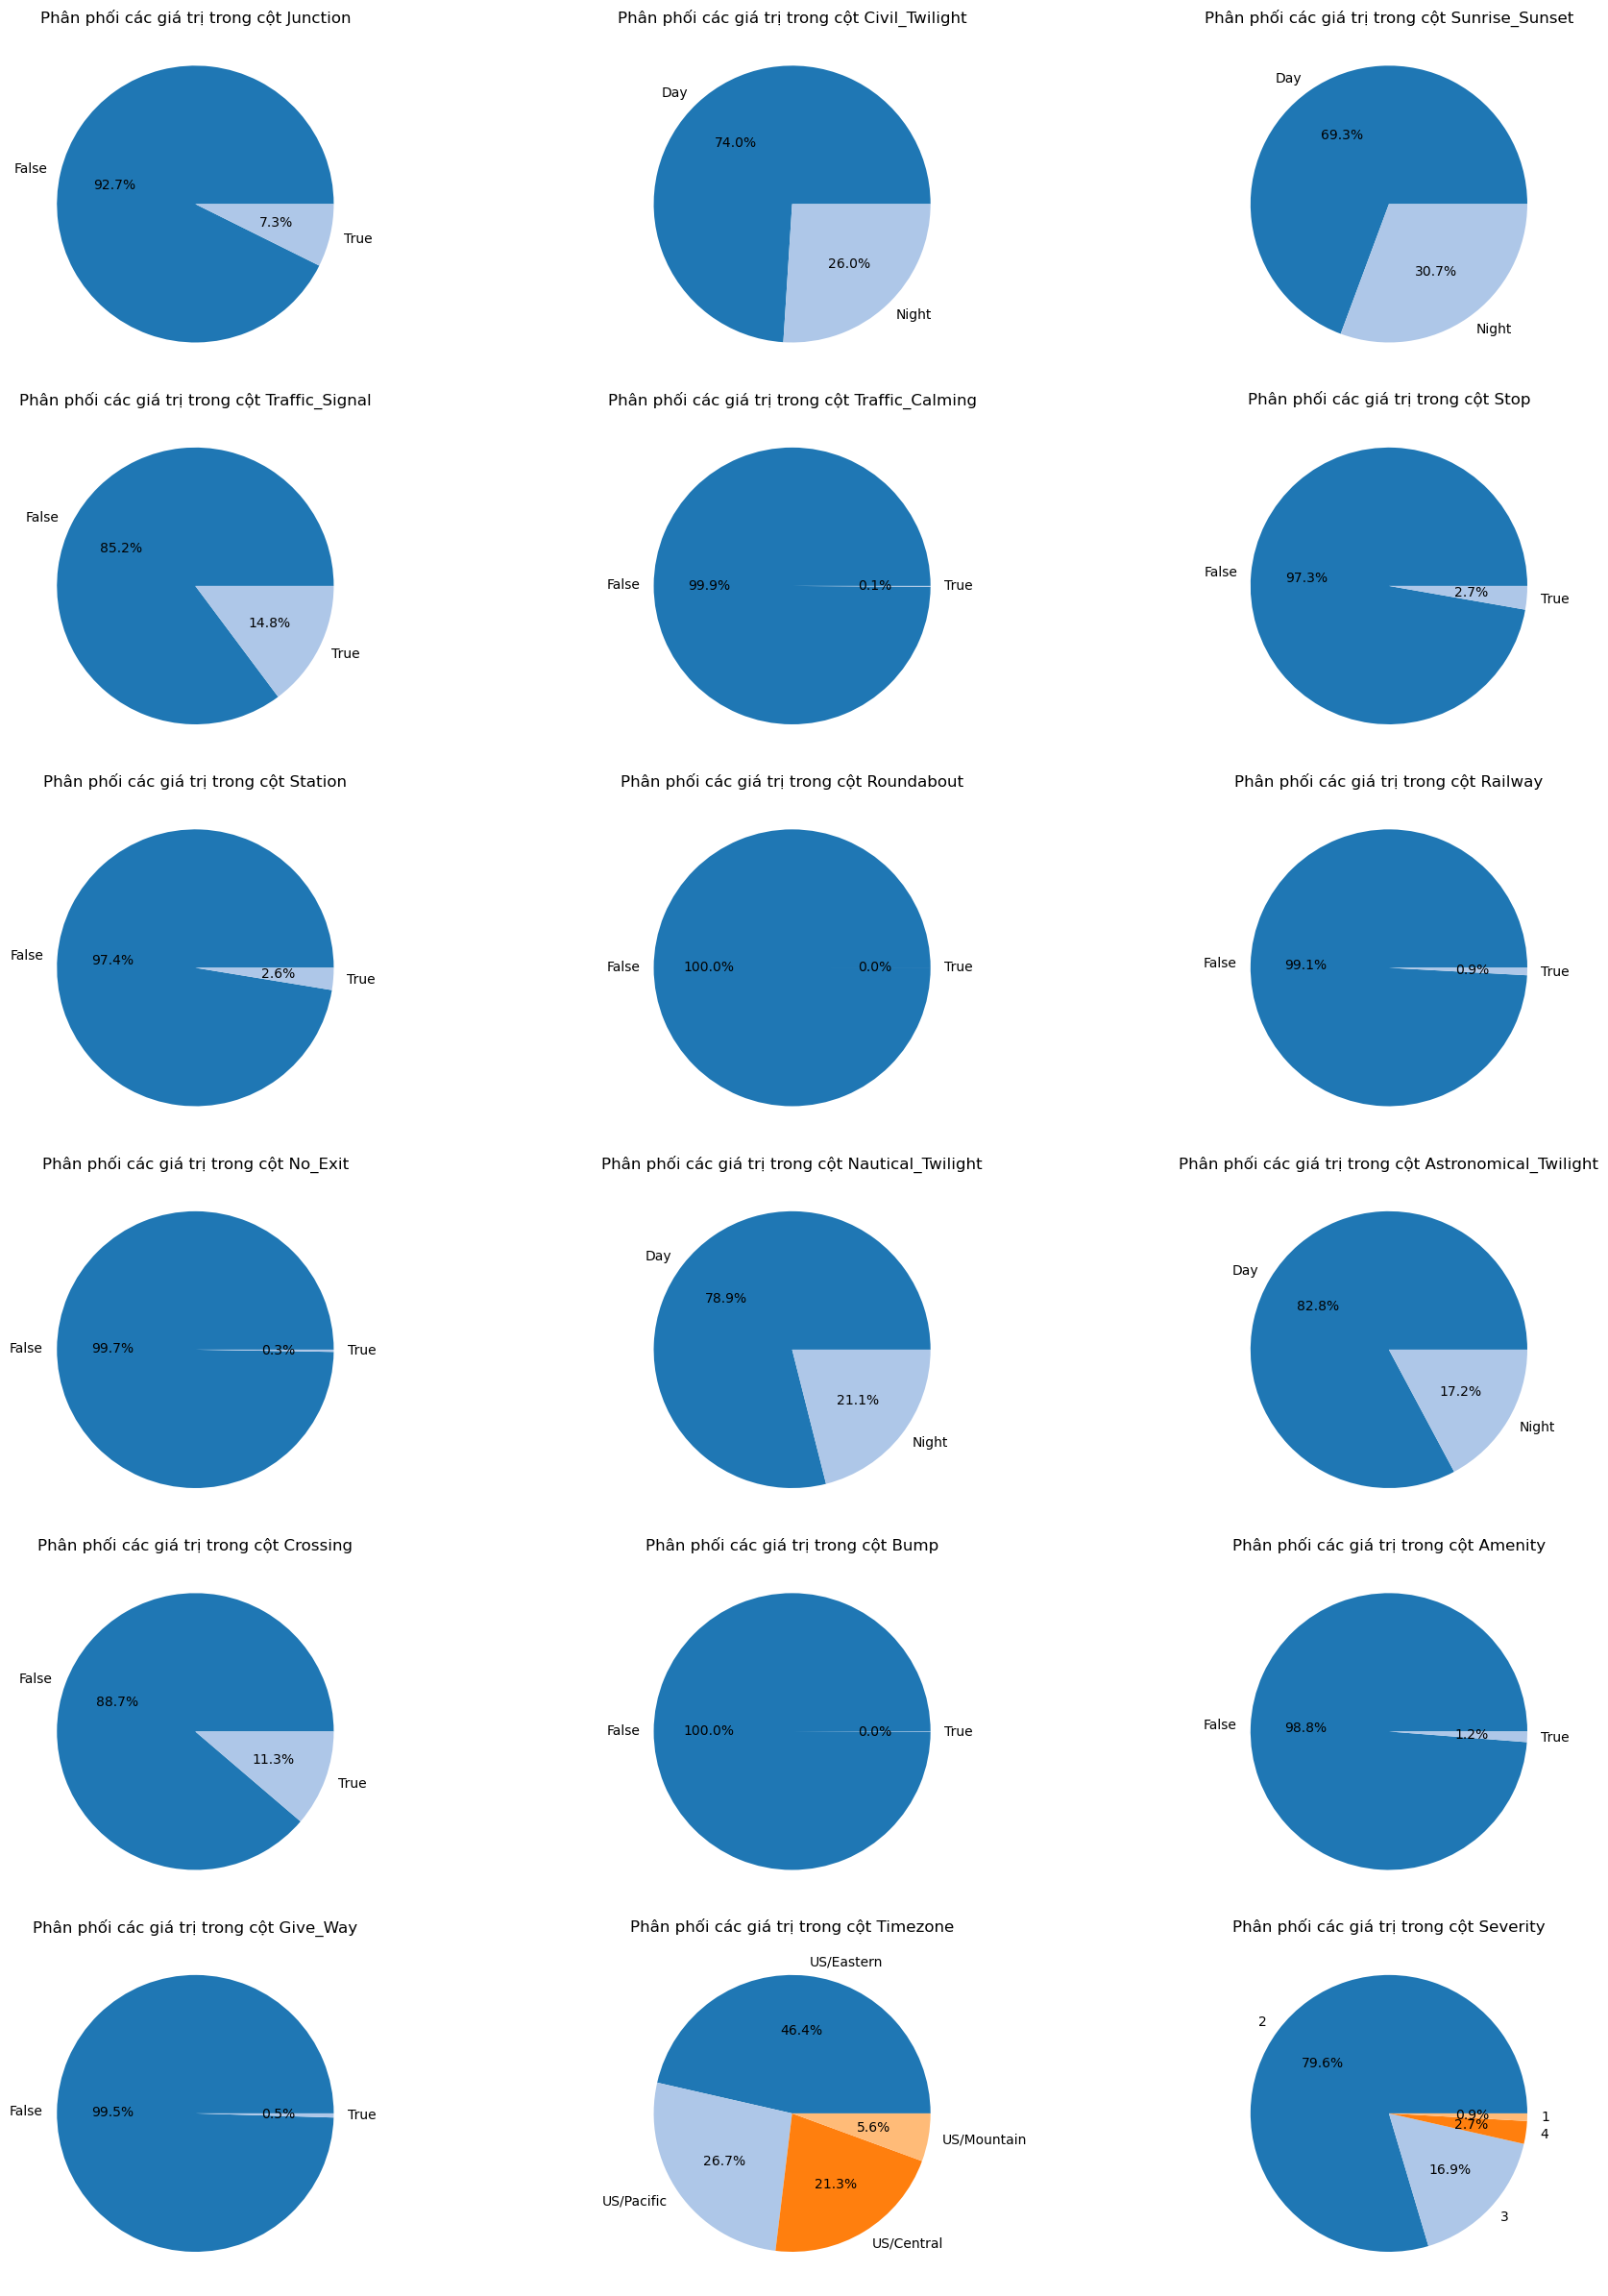

In [29]:
category_cols = pie_chart

palette = plt.cm.tab20.colors[:12]
num_cols = 3
num_rows = math.ceil(len(category_cols) / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

for i, column in enumerate(category_cols):
    row = i // num_cols
    col = i % num_cols
    
    counts = df[column].value_counts(normalize=True)
    counts = counts.sort_values(ascending=False)

    axs[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=palette)
    axs[row, col].set_title(f'Phân phối các giá trị trong cột {column}')

#Dư 1 biểu đồ nên ta cần xóa nó đi
fig.delaxes(axs.flatten()[len(category_cols)]) 
plt.tight_layout()
plt.show()


Nhận xét:
- Phần lớn các vụ tai nạn xảy ra ơ nơi không có bùng bình, gờ giảm tốc cũng như các biện pháp giảm tốc khác, đoạn nhường đường, các trạm tàu, điểm dừng chân,... Vì vậy, ta có thể lưu ý gắn thêm các biển cảnh cáo, lắp đặt vòng xuyến,.. để nâng cao sự chú ý, cảnh giác của người tham gia giao thông
- Dựa vào biến No_Exit và Junction, ta biết được hầu hết các vụ tai nạn xảy ra ở các ngã rẽ. Đây là một điều rất đáng lưu ý
- Phần lớn các vụ tai nạn xảy ra vào ban ngày, đều này có thể do mọi người thường ra ngoài vào ban ngày nhiều hơn (thời gian làm việc của trường học, công ty,...)
- Gần phân nửa các vụ tai nạn xảy ra ở miền Đông nước Mỹ, đây là vùng nên được đặt trọng tâm chú ý khi triển khai các biện pháp an toàn giao thông.

Vẽ biểu đồ cột cho các cột

In [30]:
bar_chart = unique_value_counts[unique_value_counts > 5].index
bar_chart

Index(['Wind_Direction', 'State', 'Weather_Condition', 'County', 'City'], dtype='object')

In [31]:
# Hàm vẽ biểu đồ cột ngang với dữ liệu được chuẩn hóa thành tỷ lệ phần trăm và sắp xếp giảm dần
def plot_horizontal_bar_chart(df, column, xlabel, ylabel, title):
    fig = go.Figure()
    sorted_data = df[column].value_counts(normalize=True).nlargest(15).sort_values(ascending=False)
    # print(sorted_data)
    fig.add_trace(go.Bar(
        y=sorted_data.index,
        x=sorted_data.values * 100,
        orientation='h',
        marker=dict(color='#2f5496'),
    ))

    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        yaxis=dict(autorange="reversed"),
        height=600,
        width=800,
    )

    fig.show()

# Hoặc có thể duyệt qua tất cả các cột trong bar_chart để vẽ biểu đồ cho mỗi cột
for column in bar_chart:
    plot_horizontal_bar_chart(df, column, '% Tần suất', 'Giá trị', f'Tỷ lệ phần trăm của các giá trị xuất hiện trong cột {column}')


Nhận xét:
Ta có thể thấy ở các cột có nhiều loại giá trị, các loại này chiếm một tỉ lệ gânf như tương đương nhau, không có sự chênh lệch quá nhiều, trừ cột Weather_Condition, States, Wind_Direction, County.


- Thông qua cột Wind_Direction, ta biết được phần nhiều vụ tai nạn xảy ra trong khi trời không có gió (CALM), các hướng gió còn lại như từ Nam ra Bắc(S), Nam-Nam Tây (SSW),... có số lượng vụ tai nạn khá xấp xỉ nhau.
- Khi thời tiết đẹp (Fair), có đến 35% số vụ tai nạn diễn ra ở thời tiết này, theo sau đó là khi trời có mây (Mostly Cloudy, cloudy, Party Cloudy).... Có thể do các dạng thời tiết "an toàn" này làm mọi người hạ thấp sự cảnh giác, hoặc đây chỉ là sự trùng hợp.
-  Bang California, florida, ... là các bng xảy ra nhiều vụ tai nạn nhất. Chỉ một mình CA đã chiếm đến 20% trong tổng số vụ tai nạn. Florida xếp phía sau với khoảng 12% và kế tiếp là Texas vơí khoảng 7%. Đây là các bang nên được đặt trọng tâm chú ý vào trong công tác đảm bảo an toàn giao thông hơn.
-  Do bang California, Floria và Texas dẫn đầu trong số vụ tai nạn, nên hầu hết các thành phố (City) và các hạt "County" đứng đầu trong tổng số vụ tai nạn cũng thuộc 3 bang này. 

# Lưu dữ diệu đã xử lí
Sau khi thực hiện tiền xử lí xong, ta sẽ lưu dữ liệu lại với tên "US_Accidents_processed.csv" .

In [32]:
df.to_csv("data/US_Accidents_processed.csv",index=False)